In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Fertilizer Prediction.csv")
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [34]:
df.shape

(99, 9)

In [35]:
df["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [36]:
df["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [37]:
df["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [38]:
print("Dataset Shape:", df.shape)
print("\nDataset Overview:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (99, 9)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None

Missing Values:
 Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


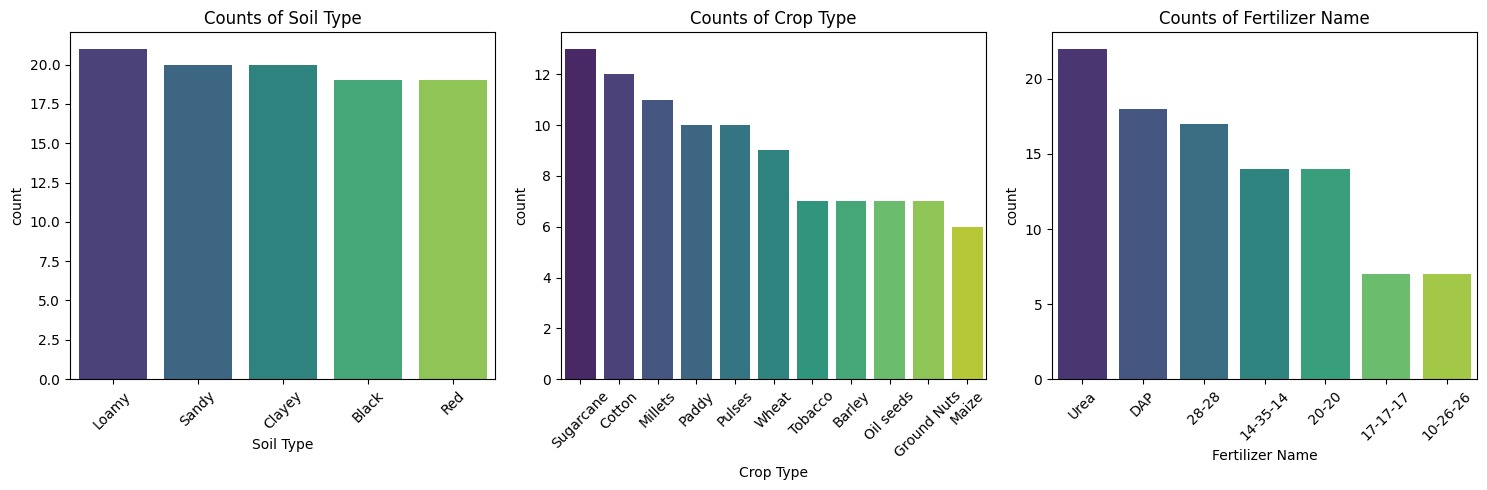

In [39]:
# Categorical Features
categorical_columns = ['Soil Type', 'Crop Type', 'Fertilizer Name']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

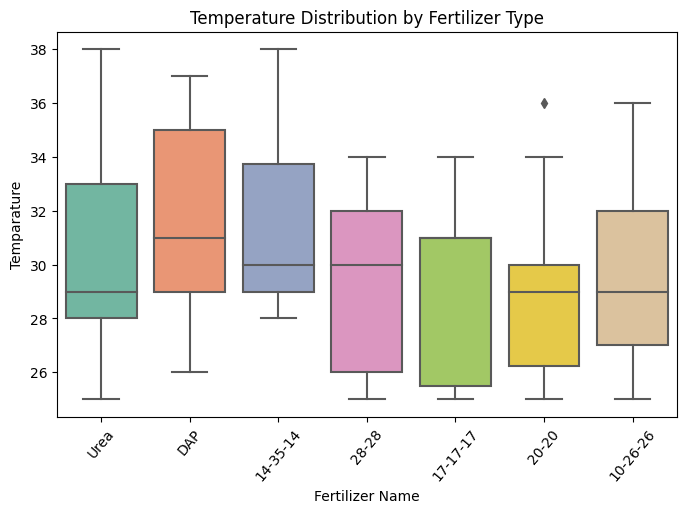

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Fertilizer Name', y='Temparature', palette='Set2')
plt.title("Temperature Distribution by Fertilizer Type")
plt.xticks(rotation=50)
plt.show()

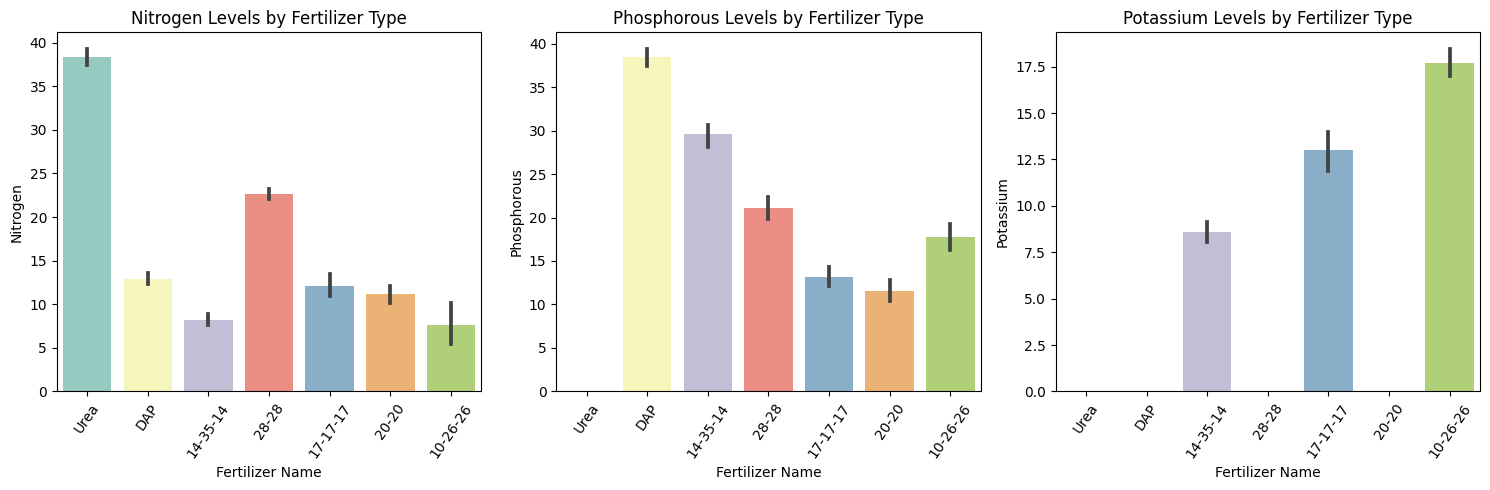

In [41]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Nitrogen', 'Phosphorous', 'Potassium']):
    plt.subplot(1, 3, i + 1)
    sns.barplot(data=df, x='Fertilizer Name', y=col, palette='Set3')
    plt.title(f"{col} Levels by Fertilizer Type")
    plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

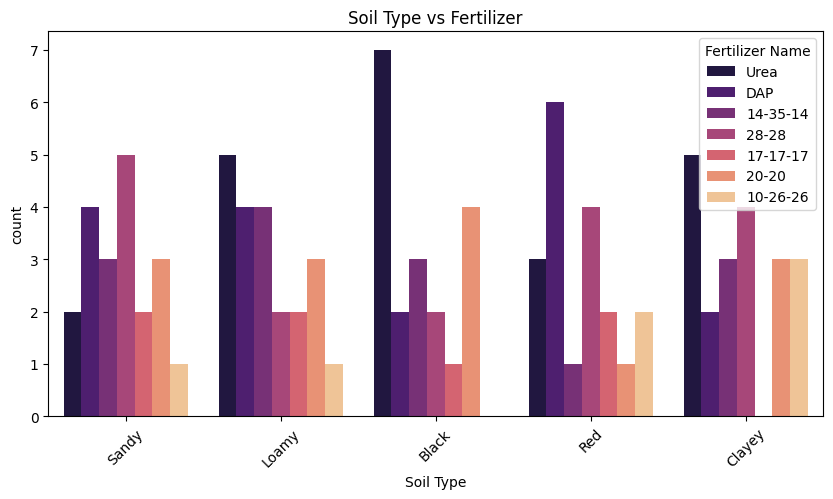

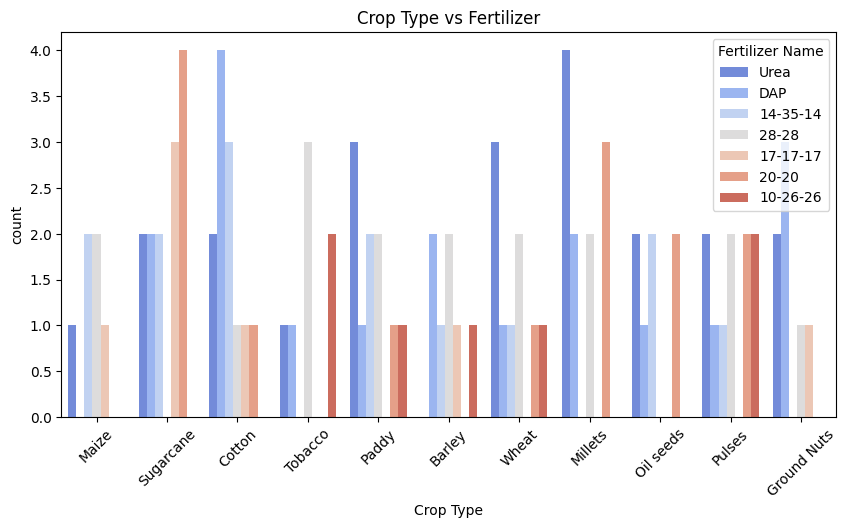

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Soil Type', hue='Fertilizer Name', palette='magma')
plt.title("Soil Type vs Fertilizer")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Crop Type', hue='Fertilizer Name', palette='coolwarm')
plt.title("Crop Type vs Fertilizer")
plt.xticks(rotation=45)
plt.show()

In [43]:
df.head(1)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea


Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object


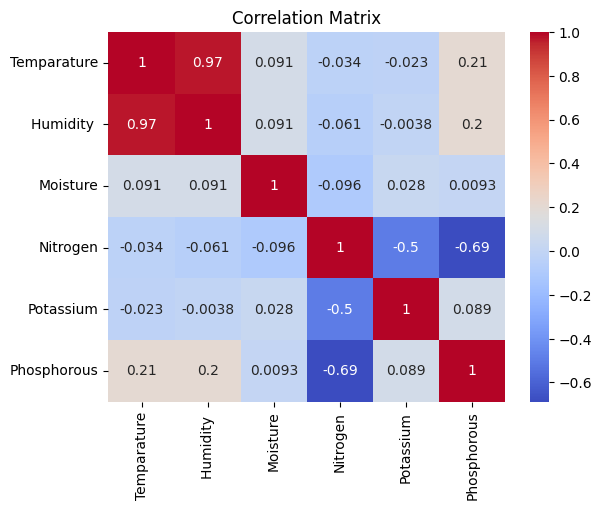

In [ ]:
print(df.dtypes)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df_encoded = pd.get_dummies(df, columns=['Soil Type', 'Crop Type'], drop_first=True)
label_encoder = LabelEncoder()
df_encoded['Fertilizer Name'] = label_encoder.fit_transform(df_encoded['Fertilizer Name'])
X = df_encoded.drop('Fertilizer Name', axis=1)
y = df_encoded['Fertilizer Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (79, 20)
Test set size: (20, 20)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9500
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20

Confusion Matrix:
[[1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


In [47]:
input_data = {
    "Temperature": [26],  
    "Humidity": [52],    
    "Moisture": [38],    
    "Nitrogen": [37],     
    "Potassium": [0],    
    "Phosphorous": [0],  
    "Soil Type": ["Sandy"],  
    "Crop Type": ["Maize"]  
}
input_df = pd.DataFrame(input_data)
input_df_encoded = pd.get_dummies(input_df, columns=['Soil Type', 'Crop Type'], drop_first=True)
for col in X.columns:
    if col not in input_df_encoded.columns:
        input_df_encoded[col] = 0
input_df_encoded = input_df_encoded[X.columns]
predicted_class = rf_classifier.predict(input_df_encoded)
predicted_fertilizer = label_encoder.inverse_transform(predicted_class)
print(f"Predicted Fertilizer Name: {predicted_fertilizer[0]}")

Predicted Fertilizer Name: Urea


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nb_classifier = GaussianNB()  
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
custom_input = {
    "Temperature": [29], 
    "Humidity": [52],     
    "Moisture": [45],    
    "Nitrogen": [12],
    "Potassium": [0],     
    "Phosphorous": [36], 
    "Soil Type": ["Loamy"], 
    "Crop Type": ["Maize"]   
}
custom_input_df = pd.DataFrame(custom_input)
custom_input_encoded = pd.get_dummies(custom_input_df, columns=['Soil Type', 'Crop Type'], drop_first=True)
for col in X.columns:
    if col not in custom_input_encoded.columns:
        custom_input_encoded[col] = 0
custom_input_encoded = custom_input_encoded[X.columns] 
custom_pred_nb = nb_classifier.predict(custom_input_encoded)
predicted_fertilizer_nb = label_encoder.inverse_transform(custom_pred_nb)
print(f"Predicted Fertilizer Name using Naive Bayes: {predicted_fertilizer_nb[0]}")

Naive Bayes Accuracy: 0.5000
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.17      1.00      0.29         1
           4       0.67      0.80      0.73         5
           5       1.00      0.60      0.75         5
           6       1.00      0.17      0.29         6

    accuracy                           0.50        20
   macro avg       0.55      0.44      0.39        20
weighted avg       0.82      0.50      0.54        20

Naive Bayes Confusion Matrix:
[[1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 4 0 0]
 [0 1 0 0 1 3 0]
 [0 0 0 4 1 0 1]]
Predicted Fertilizer Name using Naive Bayes: DAP


In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_model, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_ada = adaboost_classifier.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))
print("AdaBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))
custom_input = {
    "Temperature": [26],  
    "Humidity": [52],    
    "Moisture": [38],    
    "Nitrogen": [37],     
    "Potassium": [0],    
    "Phosphorous": [0],  
    "Soil Type": ["Sandy"],  
    "Crop Type": ["Maize"]  
}

custom_input_df = pd.DataFrame(custom_input)
custom_input_encoded = pd.get_dummies(custom_input_df, columns=['Soil Type', 'Crop Type'], drop_first=True)
for col in X.columns:
    if col not in custom_input_encoded.columns:
        custom_input_encoded[col] = 0
custom_input_encoded = custom_input_encoded[X.columns]  # Reorder columns
custom_pred_ada = adaboost_classifier.predict(custom_input_encoded)
predicted_fertilizer_ada = label_encoder.inverse_transform(custom_pred_ada)
print(f"Predicted Fertilizer Name using AdaBoost: {predicted_fertilizer_ada[0]}")

AdaBoost Accuracy: 0.7000
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.14      1.00      0.25         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.70        20
   macro avg       0.52      0.67      0.54        20
weighted avg       0.66      0.70      0.66        20

AdaBoost Confusion Matrix:
[[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]
Predicted Fertilizer Name using AdaBoost: Urea


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
gb_classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.2, max_depth=4, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
custom_input = {
    "Temperature": [30],  
    "Humidity": [55],    
    "Moisture": [50],   
    "Nitrogen": [10],    
    "Potassium": [5],     
    "Phosphorous": [20],  
    "Soil Type": ["Sandy"],  
    "Crop Type": ["Maize"]   
}
custom_input_df = pd.DataFrame(custom_input)
custom_input_encoded = pd.get_dummies(custom_input_df, columns=['Soil Type', 'Crop Type'], drop_first=True)
for col in X.columns:
    if col not in custom_input_encoded.columns:
        custom_input_encoded[col] = 0
custom_input_encoded = custom_input_encoded[X.columns] 
custom_pred_gb = gb_classifier.predict(custom_input_encoded)
predicted_fertilizer_gb = label_encoder.inverse_transform(custom_pred_gb)
print(f"Predicted Fertilizer Name using Gradient Boosting: {predicted_fertilizer_gb[0]}")

Gradient Boosting Accuracy: 0.9500
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20

Gradient Boosting Confusion Matrix:
[[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 1 0 0 4 0]
 [0 0 0 0 0 6]]
Predicted Fertilizer Name using Gradient Boosting: Urea


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
custom_input = {
    "Temperature": [30], 
    "Humidity": [55],     
    "Moisture": [50],   
    "Nitrogen": [10],    
    "Potassium": [5],    
    "Phosphorous": [20],  
    "Soil Type": ["Sandy"], 
    "Crop Type": ["Maize"]   
}
custom_input_df = pd.DataFrame(custom_input)
custom_input_encoded = pd.get_dummies(custom_input_df, columns=['Soil Type', 'Crop Type'], drop_first=True)
for col in X.columns:
    if col not in custom_input_encoded.columns:
        custom_input_encoded[col] = 0
custom_input_encoded = custom_input_encoded[X.columns]  # Reorder columns
custom_pred_svm = svm_classifier.predict(custom_input_encoded)
predicted_fertilizer_svm = label_encoder.inverse_transform(custom_pred_svm)
print(f"Predicted Fertilizer Name using SVM: {predicted_fertilizer_svm[0]}")

SVM Accuracy: 0.8500
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1
           3       0.50      1.00      0.67         1
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.85        20
   macro avg       0.64      0.80      0.68        20
weighted avg       0.84      0.85      0.83        20

SVM Confusion Matrix:
[[0 2 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 4 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]
Predicted Fertilizer Name using SVM: 20-20


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth= 5 ,random_state=42)
dt_model.fit(X_train, y_train)
# y_train_pred = dt_model.predict(X_train)
y_test_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_test_dt)
print(f"Decision Tree Training Accuracy: {accuracy_dt:.4f}")
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_test_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_test_dt))

Decision Tree Training Accuracy: 0.9000
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.71      0.71      0.71        20
weighted avg       0.90      0.90      0.90        20

Decision Tree Confusion Matrix:
[[0 0 2 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 6]]


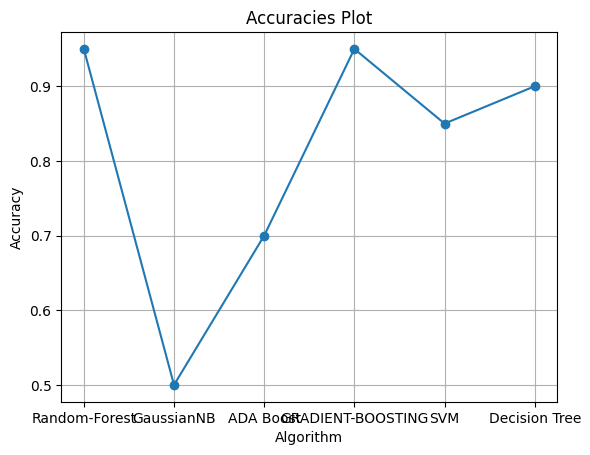

In [53]:
accuracies = [accuracy_rf,accuracy_nb,accuracy_ada,accuracy_gb,accuracy_svm,accuracy_dt]
plt.plot(accuracies, marker='o', linestyle='-')
plt.title('Accuracies Plot')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracies)), ['Random-Forest',"GaussianNB" ,'ADA Boost', 'GRADIENT-BOOSTING','SVM','Decision Tree'])
plt.grid(True)
plt.show()

In [54]:
import plotly.graph_objects as go
accuracies = [accuracy_rf,accuracy_nb,accuracy_ada,accuracy_gb,accuracy_svm,accuracy_dt]
algorithms = ['Random-Forest',"GaussianNB", 'ADA Boost', 'GRADIENT-BOOSTING','SVM','Decision Tree']
fig = go.Figure(data=go.Scatter(x=algorithms, y=accuracies, mode='markers+lines', marker=dict(symbol='circle', size=10), line=dict(width=2)))
fig.update_layout(title='Accuracies Plot', xaxis_title='Algorithm', yaxis_title='Accuracy')
fig.show()

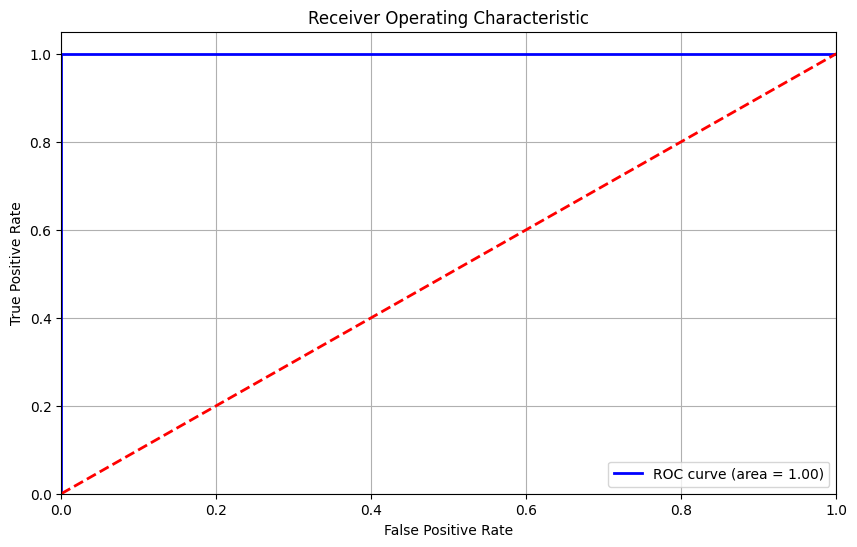

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted probabilities for the Random Forest Classifier
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)  # Change pos_label as per your dataset
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [56]:
import pickle
with open('Fertilizer_Recommendation_model.pkl', 'wb') as file:
    pickle.dump(gb_classifier, file)

In [57]:
with open('Fertilizer_Recommendation_model_2.pkl', 'wb') as file:
    pickle.dump(rf_classifier,file)